- # [reference](https://www.tensorflow.org/tutorials/quickstart/beginner)

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist # Loading the mnist data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), 
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
])

In [5]:
# Adding softmax to the model architecture.
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), 
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax(),
])

In [6]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


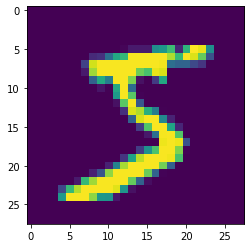

In [8]:
# lets see some images
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

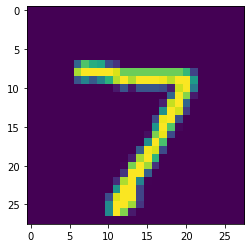

In [9]:
plt.imshow(x_test[0])

In [10]:
# For each example the model returns a vector of logits.
predictions = model(x_train[:1]).numpy() # Accuracy before training
predictions

array([[ 0.46813312,  0.47111782,  0.10975631,  0.14305651, -0.13121143,
         0.10420235, -0.38120556, -0.37457895,  0.20914505, -0.32135957]],
      dtype=float32)

In [11]:
# It converts these logits to "probabilities" for each class
tf.nn.softmax(predictions).numpy() 

array([[0.14809269, 0.14853536, 0.10348861, 0.10699281, 0.08132828,
        0.10291543, 0.06333889, 0.06376001, 0.1143027 , 0.0672452 ]],
      dtype=float32)

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [13]:
loss_fn(y_train[:1], predictions).numpy()

2.2738476

In [14]:
model.compile(optimizer='adam', loss= loss_fn, metrics= ['accuracy'])

In [15]:
# Model.fit method adjusts the model parameters to minimize the loss.
model.fit(x_train, y_train, epochs = 5, verbose = 2)

Epoch 1/5
1875/1875 - 2s - loss: 0.2921 - accuracy: 0.9155
Epoch 2/5
1875/1875 - 2s - loss: 0.1426 - accuracy: 0.9575
Epoch 3/5
1875/1875 - 2s - loss: 0.1045 - accuracy: 0.9676
Epoch 4/5
1875/1875 - 2s - loss: 0.0865 - accuracy: 0.9733
Epoch 5/5
1875/1875 - 2s - loss: 0.0749 - accuracy: 0.9762


In [16]:
# It evaluates the model on validation/test set
model.evaluate(x_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.0769 - accuracy: 0.9765


[0.07689565420150757, 0.9764999747276306]

In [20]:
x_test[:5].shape

(5, 28, 28)

In [27]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [57]:
x_test[3:4].shape

(1, 28, 28)

In [53]:
pred = tf.nn.softmax(model(x_test[3:4]).numpy()) # testing on a single image.

In [54]:
pred

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[9.9993873e-01, 8.6461654e-07, 8.4776048e-06, 1.3464327e-07,
        1.9110251e-08, 1.9576644e-05, 1.3595099e-05, 1.1613300e-05,
        7.8933891e-09, 7.0341548e-06]], dtype=float32)>

In [55]:
import numpy as np
np.argmax(pred)

0

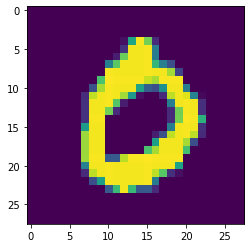

In [56]:
plt.imshow(x_test[3])